<a href="https://colab.research.google.com/github/Rajit13/CASSUM-24/blob/main/CASSUM_data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For installing $\LaTeX$

In [6]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,555 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launc

In [7]:
# Plotting setup
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

# Observed Planet

1.   Planet Parameters:

* Mass: $3\,\rm M_\oplus$
* Radius: $1.3\,\rm R_\oplus$
* Period: $1.47$ days

2.   Host:

* M-dwarf star ($T_{\rm eff} = 3291$ K)
* Mass: $0.32\, \rm M_\odot$

3. Model Planetary Atmposphere Contains: H, C, O





Metallicity distribution

## Models

**We need, Carbon-Oxygen Ratio, $\frac{C}{O}= \rm const$ but different Metallicity $Z$**

* ***Model Pair 1a***: C/10, O$_\odot \rightarrow \frac{C}{O}=\frac{1}{10}\cdot 1=\frac{1}{10}$, $[Z]_1 = -1.407E-01$

* ***Model 1b***: C$_\odot$, O10 $\rightarrow \frac{C}{O}=1 \cdot \frac{1}{10}=\frac{1}{10}$, $[Z]_2=8.593E-01$

So, $$Z_2>Z_1$$


---

* **Model Pair 2a**: C/40, O$_\odot \rightarrow \frac{C}{O}=\frac{1}{40}\cdot 1=\frac{1}{40}$, $[Z]_1 = -1.548E-01$

* ***Model 2b***: C$_\odot$, O40 $\rightarrow \frac{C}{O}=1 \cdot \frac{1}{40}=\frac{1}{40}$, $[Z]_2=1.447E+00$

---

* **Model Pair 3a**: C/60, O$_\odot \rightarrow \frac{C}{O}=\frac{1}{60}\cdot 1=\frac{1}{60}$, $[Z]_1 = -1.564E-01$

* ***Model 3b***: C$_\odot$, O60 $\rightarrow \frac{C}{O}=1 \cdot \frac{1}{60}=\frac{1}{60}$, $[Z]_2=1.622E+00$

---

* **Model Pair 4a**: C/80, O$_\odot \rightarrow \frac{C}{O}=\frac{1}{80}\cdot 1=\frac{1}{80}$, $[Z]_1 = -1.572E-01$

* ***Model 4b***: C$_\odot$, O80 $\rightarrow \frac{C}{O}=1 \cdot \frac{1}{80}=\frac{1}{80}$, $[Z]_2=1.746E+00$

---

* **Model Pair 5a**: C/100, O$_\odot \rightarrow \frac{C}{O}=\frac{1}{100}\cdot 1=\frac{1}{100}$, $[Z]_1 = -1.577E-01$

* ***Model 5b***: C$_\odot$, O100 $\rightarrow \frac{C}{O}=1 \cdot \frac{1}{100}=\frac{1}{100}$, $[Z]_2=1.842E+00$



We're using Metallicity as
$$[Z]=\log_{10}\left[\left(\frac{C+O}{H}\right)\cdot \left(\frac{C+O}{H}\right)_\odot^{-1} \right]$$

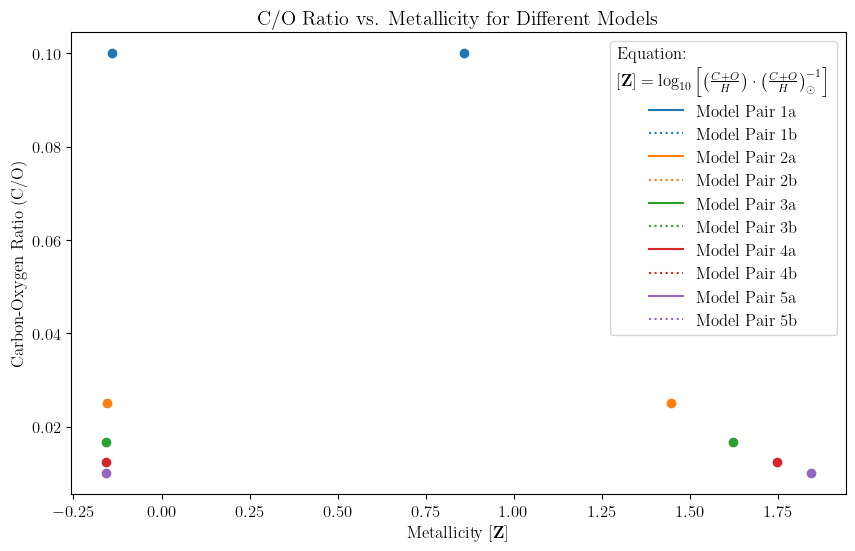

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the model pairs
model_pairs = {
    "Model Pair 1a": {"C/O": 1/10, "Z": -1.407E-01},
    "Model Pair 1b": {"C/O": 1/10, "Z": 8.593E-01},
    "Model Pair 2a": {"C/O": 1/40, "Z": -1.548E-01},
    "Model Pair 2b": {"C/O": 1/40, "Z": 1.447E+00},
    "Model Pair 3a": {"C/O": 1/60, "Z": -1.564E-01},
    "Model Pair 3b": {"C/O": 1/60, "Z": 1.622E+00},
    "Model Pair 4a": {"C/O": 1/80, "Z": -1.572E-01},
    "Model Pair 4b": {"C/O": 1/80, "Z": 1.746E+00},
    "Model Pair 5a": {"C/O": 1/100, "Z": -1.577E-01},
    "Model Pair 5b": {"C/O": 1/100, "Z": 1.842E+00}
}

# Define colors for each pair
colors = {
    "1": "tab:blue",
    "2": "tab:orange",
    "3": "tab:green",
    "4": "tab:red",
    "5": "tab:purple"
}

# Separate the data into x and y values and assign colors
x_values = []
y_values = []
colors_list = []
labels = list(model_pairs.keys())

for key in labels:
    pair_number = key.split()[2][0]  # Extract the pair number (1, 2, 3, etc.)
    x_values.append(model_pairs[key]["Z"])
    y_values.append(model_pairs[key]["C/O"])
    colors_list.append(colors[pair_number])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each point with a label
for i in range(len(labels)):
    linestyle = 'dotted' if 'b' in labels[i] else 'solid'
    plt.scatter(x_values[i], y_values[i], color=colors_list[i])
    plt.plot([x_values[i]], [y_values[i]], color=colors_list[i], linestyle=linestyle, label=labels[i])

# Set the labels and title
plt.xlabel('Metallicity $[\mathbf{Z}]$')
plt.ylabel('Carbon-Oxygen Ratio (C/O)')
plt.title('C/O Ratio vs. Metallicity for Different Models')

# Add equation to the legend
equation = r"$[\mathbf{Z}] = \log_{10} \left[\left(\frac{C+O}{H}\right) \cdot \left(\frac{C+O}{H}\right)_\odot^{-1} \right]$"
plt.legend(loc='best', title=f'Equation:\n{equation}')

# Add grid for better readability
#plt.grid(True)

# Display the plot
plt.show()


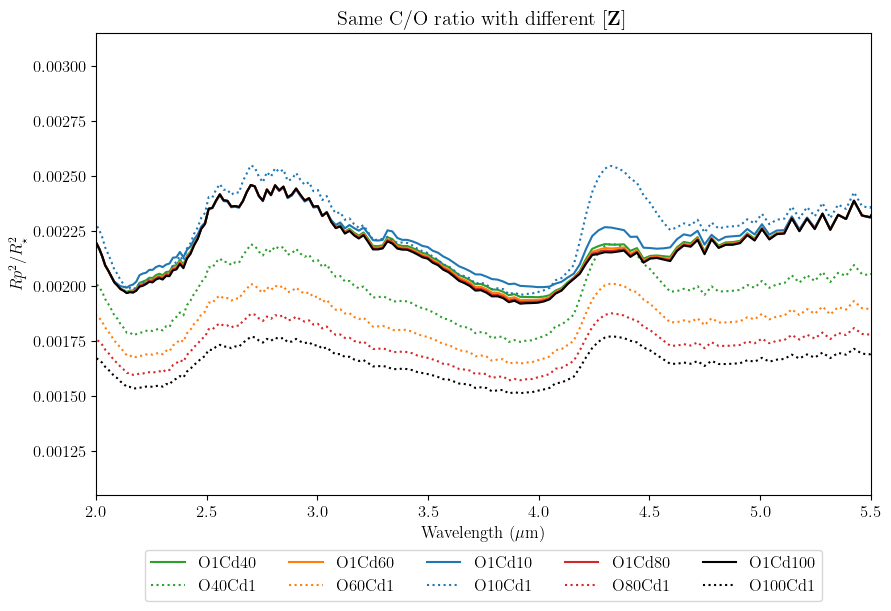

In [9]:
data1 = np.loadtxt(r'/content/trans_O1Cd40', comments='#')
data2 = np.loadtxt(r'/content/trans_O40Cd1', comments='#')
data3 = np.loadtxt(r'/content/trans_O1Cd60', comments='#')
data4 = np.loadtxt(r'/content/trans_O60Cd1', comments='#')
data5 = np.loadtxt(r'/content/trans_O1Cd10', comments='#')
data6 = np.loadtxt(r'/content/trans_O10Cd1', comments='#')
data7 = np.loadtxt(r'/content/trans_O1Cd80', comments='#')
data8 = np.loadtxt(r'/content/trans_O80Cd1', comments='#')
data9 = np.loadtxt(r'/content/trans_O1Cd100.txt', comments='#')
data10 = np.loadtxt(r'/content/trans_O100Cd1.txt', comments='#')


lambda_mu_1 = data1[:, 0]
rp2_rstar2_1 = data1[:, 1]
lambda_mu_2 = data2[:, 0]
rp2_rstar2_2 = data2[:, 1]
lambda_mu_3 = data3[:, 0]
rp2_rstar2_3 = data3[:, 1]
lambda_mu_4 = data4[:, 0]
rp2_rstar2_4 = data4[:, 1]
lambda_mu_5 = data5[:, 0]
rp2_rstar2_5 = data5[:, 1]
lambda_mu_6 = data6[:, 0]
rp2_rstar2_6 = data6[:, 1]
lambda_mu_7 = data7[:, 0]
rp2_rstar2_7 = data7[:, 1]
lambda_mu_8 = data8[:, 0]
rp2_rstar2_8 = data8[:, 1]
lambda_mu_9 = data9[:, 0]
rp2_rstar2_9 = data9[:, 1]
lambda_mu_10 = data10[:, 0]
rp2_rstar2_10 = data10[:, 1]


plt.figure(figsize=(10, 6))


plt.plot(lambda_mu_1, rp2_rstar2_1, label='O1Cd40', color='tab:green')
plt.plot(lambda_mu_2, rp2_rstar2_2, label='O40Cd1', linestyle='dotted', color='tab:green')
plt.plot(lambda_mu_3, rp2_rstar2_3, label='O1Cd60', color='tab:orange')
plt.plot(lambda_mu_4, rp2_rstar2_4, label='O60Cd1', linestyle='dotted', color='tab:orange')
plt.plot(lambda_mu_5, rp2_rstar2_5, label='O1Cd10', color='tab:blue')
plt.plot(lambda_mu_6, rp2_rstar2_6, label='O10Cd1', linestyle='dotted', color='tab:blue')
plt.plot(lambda_mu_7, rp2_rstar2_7, label='O1Cd80', color='tab:red')
plt.plot(lambda_mu_8, rp2_rstar2_8, label='O80Cd1', linestyle='dotted', color='tab:red')
plt.plot(lambda_mu_9, rp2_rstar2_9, label='O1Cd100', color='black')
plt.plot(lambda_mu_10, rp2_rstar2_10, label='O100Cd1', linestyle='dotted', color='black')

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('$Rp^2/R_{\star}^2$')
plt.title('Same C/O ratio with different $\mathbf{[Z]}$')

# Set the x-axis limit
plt.xlim(2, 5.5)


# Add legend
#plt.legend()
# Add legend and set it to display horizontally
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.savefig('Spectra5model.pdf', bbox_inches='tight')
plt.show()

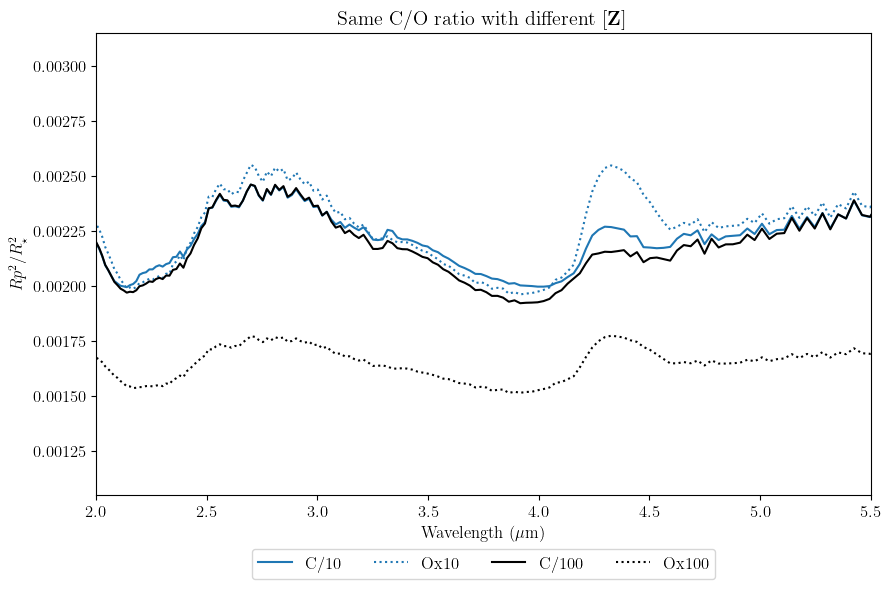

In [10]:
data1 = np.loadtxt(r'/content/trans_O1Cd40', comments='#')
data2 = np.loadtxt(r'/content/trans_O40Cd1', comments='#')
data3 = np.loadtxt(r'/content/trans_O1Cd60', comments='#')
data4 = np.loadtxt(r'/content/trans_O60Cd1', comments='#')
data5 = np.loadtxt(r'/content/trans_O1Cd10', comments='#')
data6 = np.loadtxt(r'/content/trans_O10Cd1', comments='#')
data7 = np.loadtxt(r'/content/trans_O1Cd80', comments='#')
data8 = np.loadtxt(r'/content/trans_O80Cd1', comments='#')
data9 = np.loadtxt(r'/content/trans_O1Cd100.txt', comments='#')
data10 = np.loadtxt(r'/content/trans_O100Cd1.txt', comments='#')
#data11 = np.loadtxt(r'/content/trans.dat', comments='#')


lambda_mu_1 = data1[:, 0]
rp2_rstar2_1 = data1[:, 1]
lambda_mu_2 = data2[:, 0]
rp2_rstar2_2 = data2[:, 1]
lambda_mu_3 = data3[:, 0]
rp2_rstar2_3 = data3[:, 1]
lambda_mu_4 = data4[:, 0]
rp2_rstar2_4 = data4[:, 1]
lambda_mu_5 = data5[:, 0]
rp2_rstar2_5 = data5[:, 1]
lambda_mu_6 = data6[:, 0]
rp2_rstar2_6 = data6[:, 1]
lambda_mu_7 = data7[:, 0]
rp2_rstar2_7 = data7[:, 1]
lambda_mu_8 = data8[:, 0]
rp2_rstar2_8 = data8[:, 1]
lambda_mu_9 = data9[:, 0]
rp2_rstar2_9 = data9[:, 1]
lambda_mu_10 = data10[:, 0]
rp2_rstar2_10 = data10[:, 1]
lambda_mu_11 = data10[:, 0]
rp2_rstar2_11 = data10[:, 1]


plt.figure(figsize=(10, 6))


#plt.plot(lambda_mu_1, rp2_rstar2_1, label='O1Cd40', color='tab:green')
#plt.plot(lambda_mu_2, rp2_rstar2_2, label='O40Cd1', linestyle='dotted', color='tab:green')
#plt.plot(lambda_mu_3, rp2_rstar2_3, label='O1Cd60', color='tab:orange')
#plt.plot(lambda_mu_4, rp2_rstar2_4, label='O60Cd1', linestyle='dotted', color='tab:orange')
plt.plot(lambda_mu_5, rp2_rstar2_5, label='C/10', color='tab:blue')
plt.plot(lambda_mu_6, rp2_rstar2_6, label='Ox10', linestyle='dotted', color='tab:blue')
#plt.plot(lambda_mu_7, rp2_rstar2_7, label='O1Cd80', color='tab:red')
#plt.plot(lambda_mu_8, rp2_rstar2_8, label='O80Cd1', linestyle='dotted', color='tab:red')
plt.plot(lambda_mu_9, rp2_rstar2_9, label='C/100', color='black')
plt.plot(lambda_mu_10, rp2_rstar2_10, label='Ox100', linestyle='dotted', color='black')
#plt.plot(lambda_mu_11, rp2_rstar2_11, label='solar', color='red')

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('$Rp^2/R_{\star}^2$')
plt.title('Same C/O ratio with different $\mathbf{[Z]}$')

# Set the x-axis limit
plt.xlim(2, 5.5)


# Add legend
#plt.legend()
# Add legend and set it to display horizontally
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.savefig('Spectra5model.pdf', bbox_inches='tight')
plt.show()

### From observed models $\rightarrow$ PandExo $\rightarrow$ Adding a 4th column for Resolution, $R=\lambda/\Delta \lambda$ for Retrieval runs

In [ ]:
import os
import pandas as pd
import zipfile
import shutil

# Paths to the ZIP files
zip_files = ['/content/CO2_R100.zip', '/content/H2O_R100.zip']  # Replace with your ZIP file paths
output_dir = 'Processed_Files'  # Directory to store formatted files

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define a function to process each text file
def process_file(file_path, output_path):
    # Read the file into a DataFrame
    data = pd.read_csv(file_path, sep=' ', header=None, names=['Wavelength', 'Transit Depth', 'Error'])

    # Calculate the Resolution
    data['Resolution'] = data['Wavelength'] / data['Wavelength'].diff().abs()

    # Calculate the average resolution excluding the first value
    average_resolution = data['Resolution'][1:].mean()

    # Assign the average resolution to the first data point
    data['Resolution'].iloc[0] = average_resolution

    # Save the formatted file
    with open(output_path, 'w') as f:
        f.write(f"{'Wavelength':<15}{'Transit Depth':<20}{'Err_Transit Depth':<20}{'Resolution':<20}\n")
        for _, row in data.iterrows():
            f.write(
                f"{row['Wavelength']:<15.6f}"
                f"{row['Transit Depth']:<20.10f}"
                f"{row['Error']:<20.10f}"
                f"{row['Resolution']:<20.6f}\n"
            )

# Process all text files in each ZIP file
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall('temp_files')  # Extract to a temporary directory
        for root, _, files in os.walk('temp_files'):  # Walk through all directories
            for file_name in files:
                if file_name.endswith('.txt'):  # Only process text files
                    input_path = os.path.join(root, file_name)
                    relative_path = os.path.relpath(input_path, 'temp_files')
                    output_path = os.path.join(output_dir, f"Formatted_{relative_path}")
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)
                    process_file(input_path, output_path)

# Cleanup temporary files
shutil.rmtree('temp_files')

print(f"All files processed and saved in '{output_dir}'")

In [ ]:
import shutil
from google.colab import files

# Path to the folder you want to compress and download
folder_to_zip = 'Processed_Files'
zip_file_name = 'Processed_Files.zip'

# Compress the folder into a ZIP file
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_to_zip)

# Download the ZIP file
files.download(zip_file_name)
